f:\ML\python\Deep learning\Customer Churn ANN\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3365 - val_loss: 0.1810
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1371 - val_loss: 0.0845
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0500 - val_loss: 0.0116
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 6.8578e-04
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7427e-04 - val_loss: 6.1620e-05
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6975e-05 - val_loss: 1.5338e-05
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3823e-05 - val_loss: 1.1734e-05
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1974e-05 - val_loss: 1.1037e-05
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1412e-05 - val_loss: 1.0642e-05
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1523e-05 - val_loss: 1.0957e-05
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0973e-05 - val_loss: 1.0652e-05
Epoch 

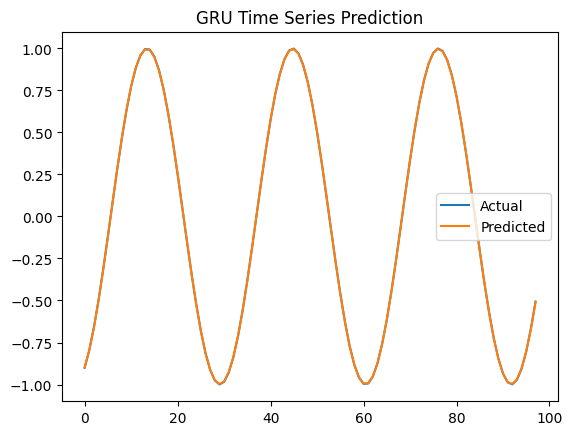

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Step 1: ডামি টাইম সিরিজ ডেটা তৈরি
# (যেমন y = sin(x))
x = np.linspace(0, 100, 500)
y = np.sin(x)

# Step 2: ডেটাকে সিকোয়েন্স আকারে reshape করা
def create_sequences(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

seq_length = 10
X, Y = create_sequences(y, seq_length)

# GRU ইনপুট শেপ (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 3: Train/Test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Step 4: GRU Model তৈরি
model = Sequential([
    GRU(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 6: Train
history = model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_data=(X_test, Y_test))

# Step 7: Predict
predictions = model.predict(X_test)

# Step 8: Visualization
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("GRU Time Series Prediction")
plt.show()
